# Save and load results as HDF5 files

In [1]:
import pypesto
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pypesto.storage import (save_to_hdf5, read_from_hdf5)
import tempfile

%matplotlib inline

## Define the objective and problem

In [18]:
# first type of objective
objective = pypesto.Objective(fun=sp.optimize.rosen, 
                               grad=sp.optimize.rosen_der, 
                               hess=sp.optimize.rosen_hess)


dim_full = 10
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

## Run optimization

In [19]:
# create optimizers
optimizer = pypesto.ScipyOptimizer(method='l-bfgs-b')

# set number of starts
n_starts = 20

# Run optimizaitons for different optimzers
result = pypesto.minimize(
    problem=problem, optimizer=optimizer,
    n_starts=n_starts)

In [4]:
result.optimize_result.list

[{'id': '9',
  'x': array([0.99999998, 0.99999995, 0.99999996, 0.99999994, 0.99999995,
         0.99999995, 0.99999998, 0.99999999, 1.00000002, 1.00000003]),
  'fval': 2.117727410471738e-12,
  'grad': array([ 2.90361666e-06, -2.19516961e-05, -2.27528222e-06, -1.93978426e-05,
         -9.22015804e-06, -2.41825073e-05,  6.00141640e-06, -9.50957727e-06,
          1.62081451e-05, -4.27311919e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 96,
  'n_grad': 96,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([0.99999998, 0.99999995, 0.99999996, 0.99999994, 0.99999995,
         0.99999995, 0.99999998, 0.99999999, 1.00000002, 1.00000003]),
  'fval0': 115026.07710204029,
  'trace': None,
  'exitflag': 0,
  'time': 0.016263246536254883,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '1',
  'x': array([0.99999999, 1.00000007, 0.99999999, 1.00000009, 1.00000003,
         1.00000008, 1.00000002, 1.00000016, 1.00000026, 1.00000051]),
  'fval': 1.

## Plot results

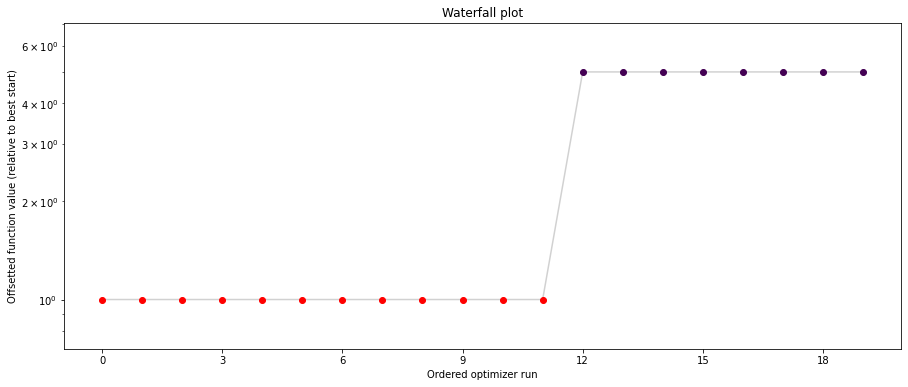

In [5]:
import pypesto.visualize

# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

## Save optimization result as HDF5 file

In [21]:
fn = tempfile.mktemp(".hdf5")

# Write result
hdf5_writer = save_to_hdf5.OptimizationResultHDF5Writer(fn)
hdf5_writer.write(result)

# Write problem
hdf5_writer = save_to_hdf5.ProblemHDF5Writer(fn)
hdf5_writer.write(problem)

In [7]:
hdf5_reader = read_from_hdf5.OptimizationResultHDF5Reader(fn)
result = hdf5_reader.read()

In [8]:
result.optimize_result.list

[{'id': '9',
  'x': array([0.99999998, 0.99999995, 0.99999996, 0.99999994, 0.99999995,
         0.99999995, 0.99999998, 0.99999999, 1.00000002, 1.00000003]),
  'fval': 2.117727410471738e-12,
  'grad': array([ 2.90361666e-06, -2.19516961e-05, -2.27528222e-06, -1.93978426e-05,
         -9.22015804e-06, -2.41825073e-05,  6.00141640e-06, -9.50957727e-06,
          1.62081451e-05, -4.27311919e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 96,
  'n_grad': 96,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([0.99999998, 0.99999995, 0.99999996, 0.99999994, 0.99999995,
         0.99999995, 0.99999998, 0.99999999, 1.00000002, 1.00000003]),
  'fval0': 115026.07710204029,
  'trace': None,
  'exitflag': 0,
  'time': 0.016263246536254883,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '1',
  'x': array([0.99999999, 1.00000007, 0.99999999, 1.00000009, 1.00000003,
         1.00000008, 1.00000002, 1.00000016, 1.00000026, 1.00000051]),
  'fval': 1.

## Plot results

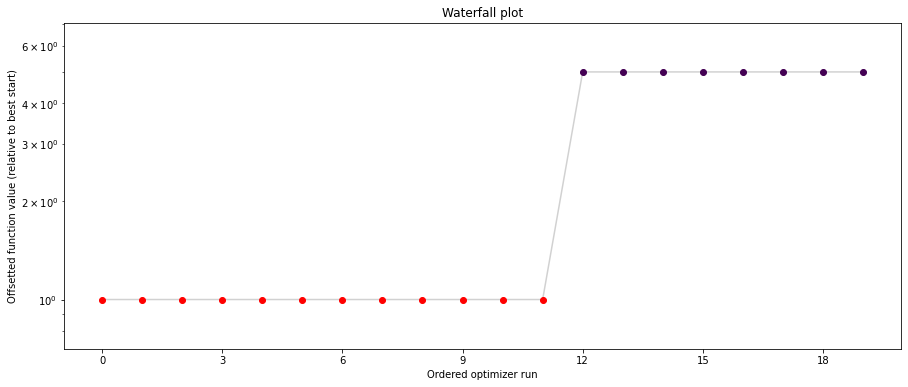

In [9]:
# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

In [10]:
pypesto.visualize.parameters(result,
                            balance_alpha=False)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [20]:
result.problem.dim

10